# <h1 style="color:firebrick">ETL Project Report</h1>
___
### Sommelier Data Obtained from [Kaggle](https://www.kaggle.com/)
### Ben Reiff, Chelsea Snedden, Morgan Bricker

# <h1 style="color:firebrick">Extract </h1>
___
### We began by downloading a CSV from Kaggle open source data on [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews/version/4#winemag-data-130k-v2.json) and located a CSV that scraped data from this website, [Napa Valley Wine Locations and Info](https://napavintners.com/wineries/all_wineries.asp).
___
### Why we chose this topic:
   #### 1. We were interested in wine tourism in California for planning future trips.
   #### 2. We found this dataset to be unique in comparison to previous projects.
   #### 3. Huge fans of wine, one of us has experience working in fine dining.
___

### Our Extraction process:
   #### - Downloaded CSV file from Wine Reviews Kaggle
   #### - Downloaded CSV file from a web scrape of a Napa Valley wineries list from this Github of [Napa Valley Wineries List](https://github.com/paladin74/thesis/blob/master/Napa-Winery-List62012.csv), based on open source data from [Napa Valley Wine Locations and Info](https://napavintners.com/wineries/all_wineries.asp).  
   #### - In our Github, the files are 'winemag-data-130k-v2.csv' and 'Napa-Winery-List62012.csv'.
   #### - We chose to use CSVs as a format because it made the cleaning of the data more uniform when using the data frames for the next task.

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Convert winemag-data-130k-v2.csv 
wine_rating = "winemag-data-130k-v2.csv"
wine_rating = pd.read_csv(wine_rating)

In [3]:
# Identify columns for cleaning
wine_rating.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

# <h1 style="color:firebrick">Transform</h1>
---
### Our Transformation process was centered around what made the data easier to work with.
#### 1. Used Pandas to read in the CSVs into their own data frames and list the columns so we could see which columns we want to clean out.
#### 2. Narrowed the scope of our original wine ratings CSV to focus on Californian wines.
#### 3. Used the .dropna() function to drop blank entries in both datasets.
#### 4. Created a condensed version of each data frame by only stating the columns we wanted to keep using the .copy() function.
#### 5. Used the .to_csv() function to upload our newly cleaned, condensed CSVs so we could upload them into a MongoDB database with ease, (in our Github, these are files 'cleaned_napa_wineries.csv' and 'condensed_wine_rating.csv').

In [4]:
# Drop cells without data
clean_wine_rating = wine_rating.dropna()

In [5]:
# Drop columns we don't intend to use
condensed_wine_rating = clean_wine_rating[['description', 
                                           'designation', 
                                           'points', 
                                           'price', 
                                           'province', 
                                           'region_1', 
                                           'region_2', 
                                           'title', 
                                           'variety', 
                                           'winery']].copy()

In [80]:
#Taking cleaned columns to CSV
condensed_wine_rating.to_csv('condensed_wine_rating.csv')

In [73]:
california_wine_rating = condensed_wine_rating.loc[condensed_wine_rating["province"]=="California"]

In [7]:
# Convert Napa-Winery-List62012.csv 
napa_wineries = "Napa-Winery-List62012.csv"
napa_wineries_df = pd.read_csv(napa_wineries)

In [9]:
# Identify columns for cleaning
napa_wineries_df.columns

Index(['Winery', 'Address', 'City', 'Website', 'Phone', 'NWP', 'App', 'Cave',
       'Tours', 'Notes/Labels', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [75]:
condensed_napa_wineries = napa_wineries_df[['Winery', 
                                            'Address', 
                                            'City', 
                                            'Website', 
                                            'Phone']].copy()

In [76]:
cleaned_napa_wineries = condensed_napa_wineries.dropna()

In [79]:
cleaned_napa_wineries.to_csv('cleaned_napa_wineries.csv')

# <h1 style="color:firebrick"> Load</h1>
___
### Our Loading process utilized MongoDB.
#### We created a database named "Sommelier_DB" including two collections (one for each CSV) named 'Wine_Location' and 'Wine_info' so we could query based on: 
#### 1. Winery, wine varietals, wine information, and prices.
#### 2. Winery, address, location, and phone number.

# <h1 style="color:firebrick"> Final Databases, Tables, Collections </h1>
___
#### Screenshots of MongoDB below.

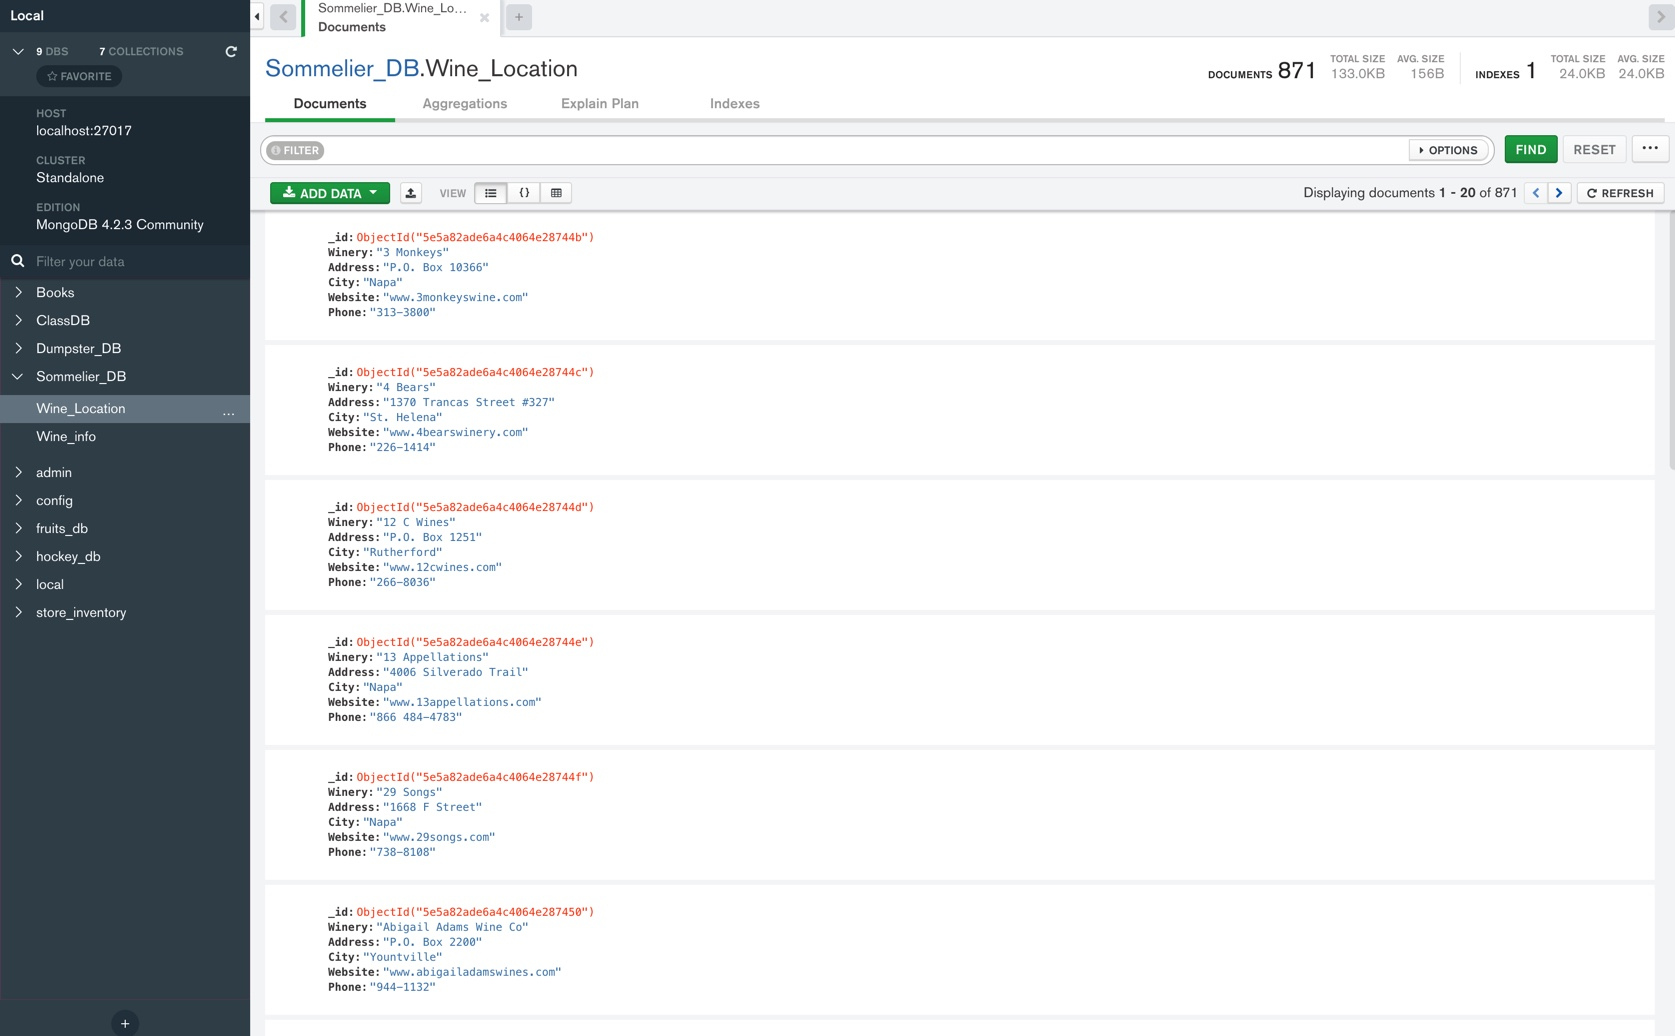

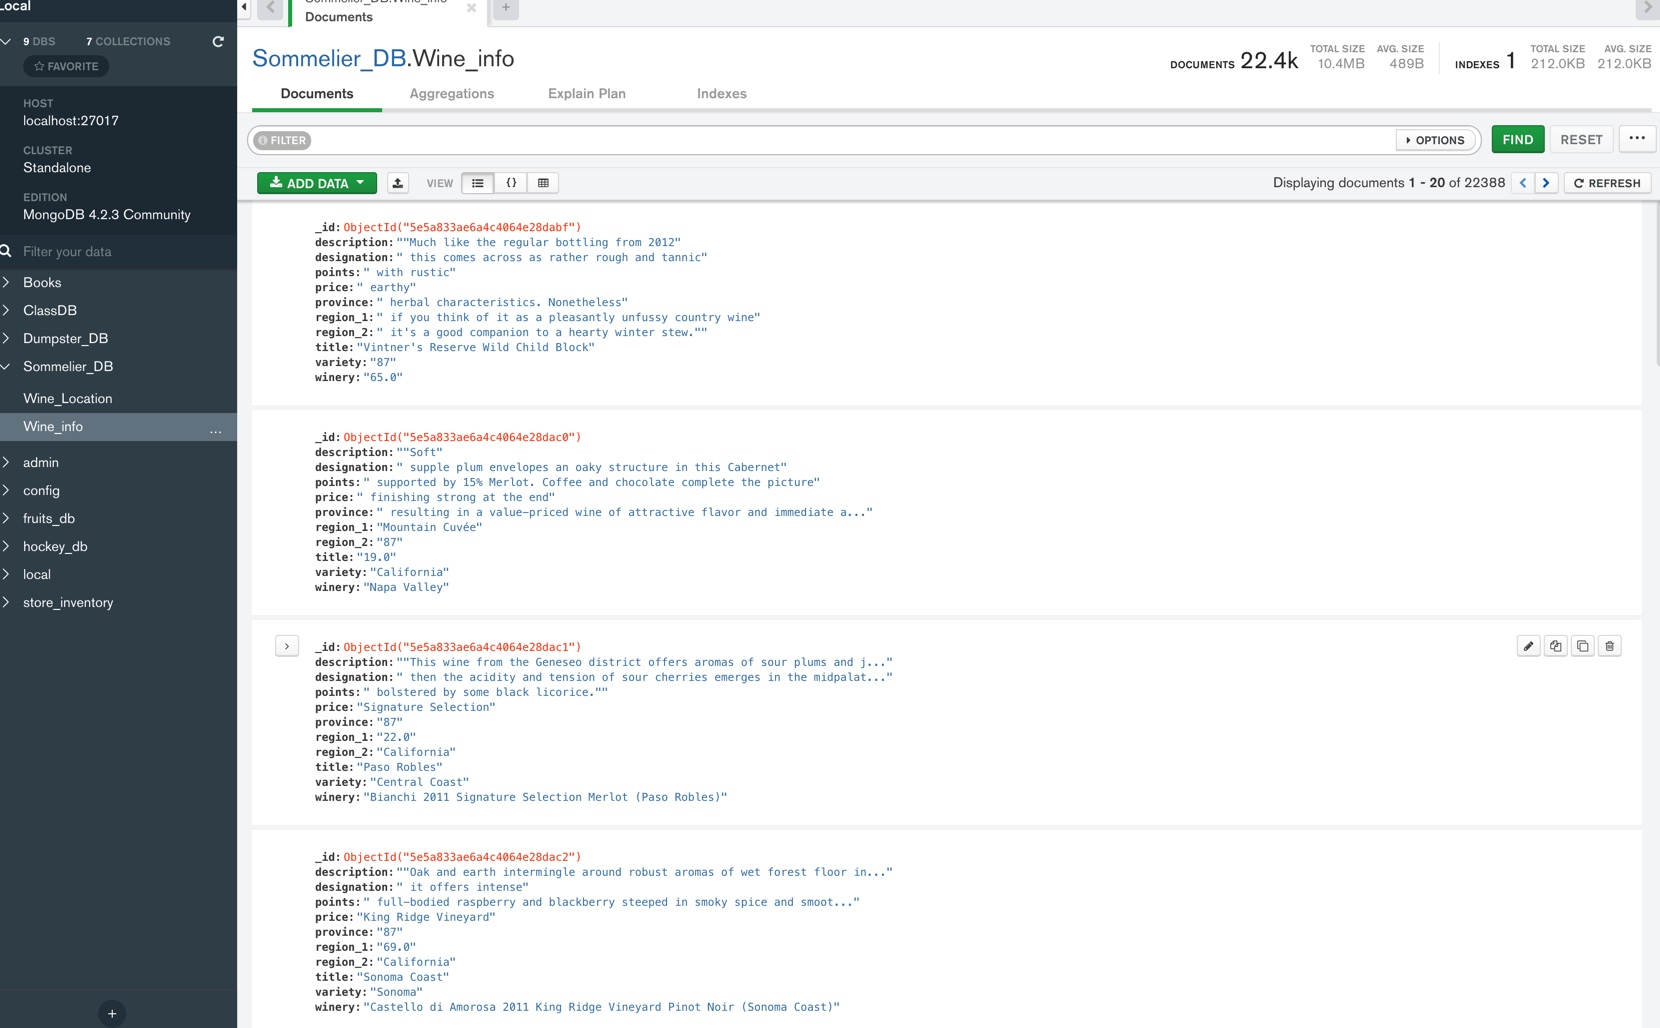

# <h1 style="color:firebrick"> So, Why? </h1>
___
### The purpose of this exercise was to extract data, transform it to a usable format and load it into MongoDB.
#### The 'new' aspect of this data can be found when you query one of the Napa Valley Wineries; one collection provides us with winery, wine varietals, and wine info, whereas, another provides us with the winery address, location, and phone number should we wish to visit that winery on a vacation trip to Napa Valley.

# ***Rubric:***
 At the end of the week, your team will submit a Final Report that describes the following:


Extract: your original data sources and how the data was formatted (CSV, JSON, pgAdmin 4, etc).


Transform: what data cleaning or transformation was required.


Load: the final database, tables/collections, and why this was chosen.


Please upload the report to Github and submit a link to Bootcampspot. 